In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

In [2]:
class Automata: #Binary Automata

    def __init__(self, rule, start = 5):
        
        if(type(start)!=int):
            self.world = start;
            self.n = len(start);
        else:
            self.n = start;
            self.world_gen();
        self.rule = rule;
        self.prop = self.decode_rule(rule);
        self.history = [];

    def advance(self):
        new_world = np.random.random((self.n,self.n)).astype(int)
        for i in range(self.n):
            for j in range(self.n):
                neighbors = [self.world[i][(j+1)%self.n], 
                            self.world[(i-1)%self.n][j],
                            self.world[i][(j-1)%self.n],
                            self.world[(i+1)%self.n][j]]
                new_world[i][j] = self.prop(self.world[i][j], neighbors);
        self.history.append(self.world)
        self.world = new_world;

    def world_gen(self):
        self.world = np.round(np.random.random((self.n, self.n))).astype(int)

    def decode_rule(self, rule):
        rule = setup(rule)
        
        def prop(cell, neighbors):
            s = cell
            for i in range(len(neighbors)):
                s+=neighbors[i]*2**(i+1)

            return int(rule[s])
        return prop


In [3]:
trivial = '01'*16

def setup(rule):
    if type(rule)!=str:
        rule = to_bin(rule, 32)
    else:
        rule = rule+'0'*(32-len(rule))
    return rule

def to_bin(n, digits = 5):
    bin_form = bin(n)[2:]
    bin_form = '0'*(digits-len(bin_form))+bin_form
    return bin_form

def bin_inv(str):
    return str.replace('0', '2').replace('1','0').replace('2','1')

def change_digit(case, digit, length = 5):
    bin_form = to_bin(case)
    return bin_form[:digit] + str((int(bin_form[digit])+1)%2)+ bin_form[digit+1:]

def tot_inf(rule):
    rule = setup(rule)
    count = 0;
    for i in range(31,-1, -1):
        for j in range(5):
            if(rule[i]!=rule[int(change_digit(i, j), 2)]):
                count+=1;
    return count/(32*5)
    
def agg(rule):
    rule = setup(rule)
    
    s = 0
    for i in rule:
        s+=2*(int(i)-1/2)
    
    return s/32

def stab(rule):
    rule = setup(rule)
    
    s = 0
    for i in range(len(rule)):
        s+= (-1)**(i+1)*2*(int(rule[i])-1/2)
    
    return s/32

### Interesting Rules

- rule 2354 has bees

In [16]:
np.random.randint(0,2**32, dtype=np.int64)

974782995

In [17]:
rule = bin_inv(setup(974782995))
print(tot_inf(rule))
print(agg(rule))
print(stab(rule))

0.3625
0.3125
0.1875


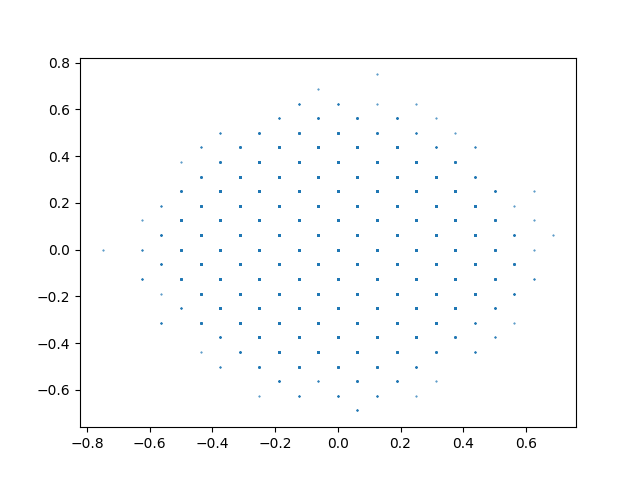

In [5]:
#dumb dumb haha
x = []
y = []
for i in np.random.randint(0, 4294967296, 32000, dtype = np.int64):
    x.append(stab(i))
    y.append(agg(i))
plt.scatter(x,y, s = 0.2)
plt.show()

In [5]:
rule = rule[:-2] + '1' + rule[-1]

In [6]:
rule

'11111111111111111111011011001111'

In [9]:
2**32

4294967296

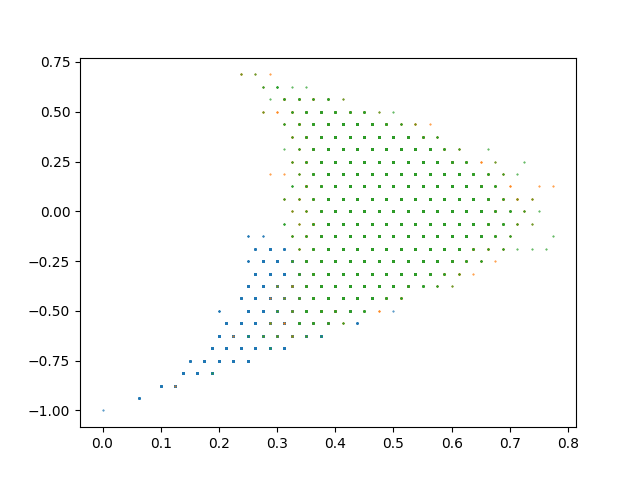

In [12]:
#dumb dumb haha
x = []
y = []
for i in np.random.randint(0, 4294967296, 32000, dtype = np.int64):
    x.append(tot_inf(i))
    y.append(agg(i))
plt.scatter(x,y, s = 0.2)
plt.show()

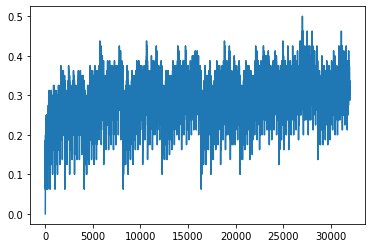

In [37]:
#graphs tot_inf
x = []
y = []

for i in range(32000):
    x.append(i)
    bin_form = to_bin(i, 32)
    y.append(tot_inf(bin_form))

plt.plot(x,y)

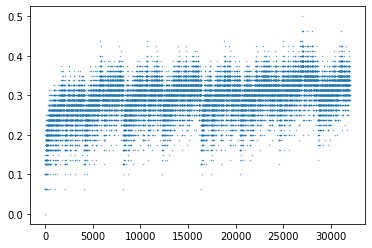

In [38]:
plt.scatter(x,y, s=0.1)

In [21]:
a = Automata(rule, start = 100)

In [22]:
for i in range(100):
    a.advance();

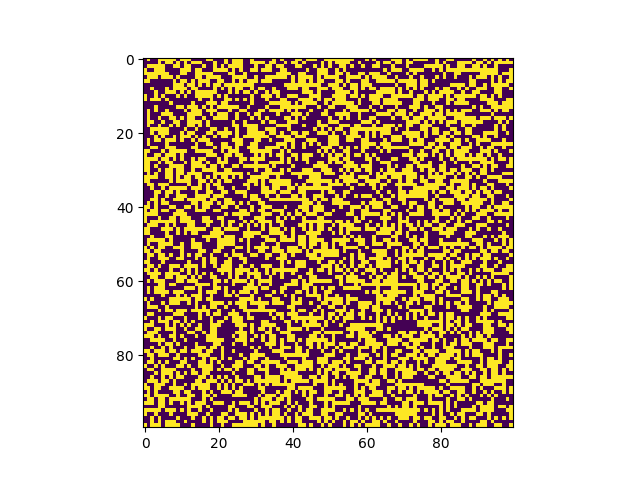

In [23]:
def create_video(a):

    fig = plt.figure()
    im = plt.imshow(a.history[0])

    def animate(t):
        im.set_array(a.history[t])
        return im, 

    anim = FuncAnimation(
        fig,
        animate,
        frames = len(a.history),
        interval = 10,
        blit = True
    )

    plt.show()

    return anim

anim = create_video(a)